In [1]:
import numpy as np
import zdm.analyze_cube as ac
cube_dir  = "../CRACO/Cubes/craco_mini_cube.npz"
import matplotlib.pyplot as plt

In [2]:
cube=np.load(cube_dir)

In [3]:
lls = cube["ll"]

In [4]:
uvals, ijs, arrays, warrays = ac.get_2D_bayesian_data(cube['ll'])

/home/jovyan/zdm/zdm/analyze_cube.py:505: RuntimeWarning: All-NaN slice encountered
  themax = np.nanmax(lls)
/home/jovyan/zdm/zdm/analyze_cube.py:517: RuntimeWarning: All-NaN slice encountered
  wthemax = np.nanmax(wlls)


In [5]:
def ij_idx(param_1, param_2):
    idx_1 = np.where(cube["params"] == param_1)[0][0]
    idx_2 = np.where(cube["params"] == param_2)[0][0]
    return np.where((np.array(ijs) == [idx_1, idx_2])[:, 0] & (np.array(ijs) == [idx_1, idx_2])[:, 1])[0][0]

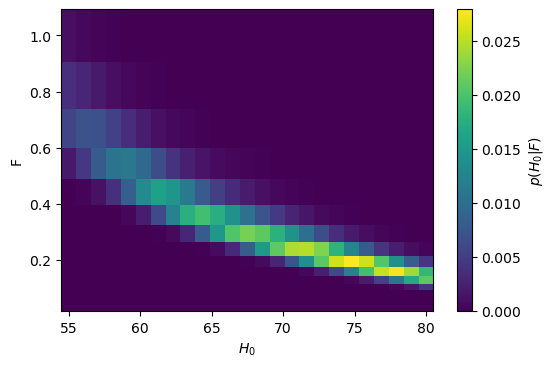

In [6]:
fig, ax = plt.subplots(dpi=100)

xx, yy = np.meshgrid(cube["H0"], 10**(cube["logF"]))
data = np.array(arrays[ij_idx("H0", "logF")])

array = data
# array -= np.max(array)
# array = 10**array
# array /= np.sum(array)

f = ax.pcolormesh(xx, yy, array.T)
ax.set_xlabel(r"$H_0$")
ax.set_ylabel("F")
plt.colorbar(f, ax=ax, label=r"$p(H_0 | F)$")
plt.show()

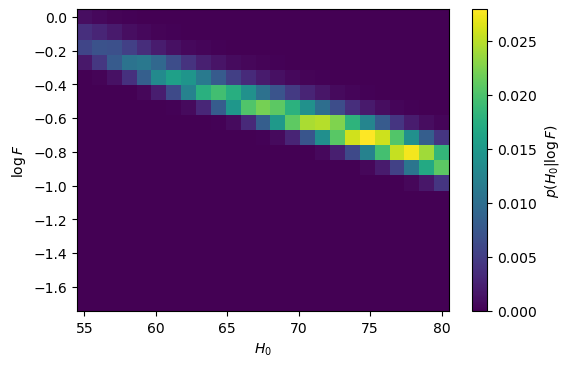

In [8]:
fig, ax = plt.subplots(dpi=100)

xx, yy = np.meshgrid(cube["H0"], (cube["logF"]))
data = np.array(arrays[ij_idx("H0", "logF")])

array = data
# array -= np.max(array)
# array = 10**array
# array /= np.sum(array)

f = ax.pcolormesh(xx, yy, array.T)
ax.set_xlabel(r"$H_0$")
ax.set_ylabel(r"$\log F$")
plt.colorbar(f, ax=ax, label=r"$p(H_0 | \log F)$")
plt.show()

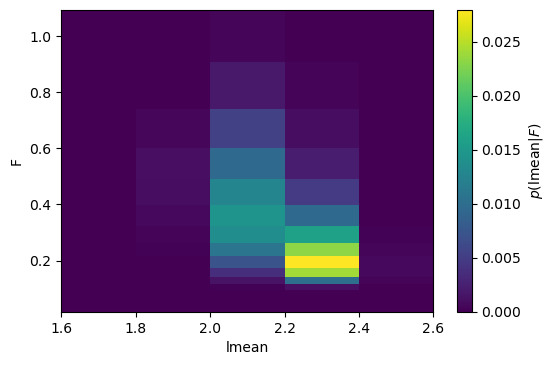

In [11]:
fig, ax = plt.subplots(dpi=100)

xx, yy = np.meshgrid(cube["lmean"], 10**(cube["logF"]))
data = np.array(arrays[ij_idx("lmean", "logF")])
ax.pcolormesh(xx, yy, data.T)
ax.set_xlabel("lmean")
ax.set_ylabel("F")
plt.colorbar(f, ax=ax, label=r"$p(\mathrm{lmean} | F)$")
plt.show()

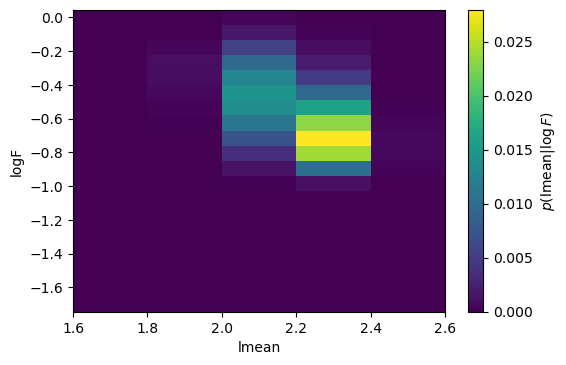

In [15]:
fig, ax = plt.subplots(dpi=100)

xx, yy = np.meshgrid(cube["lmean"], cube["logF"])
data = np.array(arrays[ij_idx("lmean", "logF")])
ax.pcolormesh(xx, yy, data.T)
ax.set_xlabel("lmean")
ax.set_ylabel("logF")
plt.colorbar(f, ax=ax, label=r"$p(\mathrm{lmean} | \logF)$")
plt.show()